In [1]:
# Packages

import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
from scipy import special
plt.rcParams["figure.figsize"] = (9,7)
from scipy.stats import chisquare

In [2]:
# Not my functions 

def Voigt(x, x0, sigma, gamma):
    '''
    x should be an array.
    sigma is the Doppler parameter.
    gamma is the Gaussian sigma.
    x0 is the center position.
    '''
    z = ((x-x0) + 1j * abs(gamma)) / abs(sigma) / 2**0.5
 
    return (special.wofz(z)).real/abs(sigma)/(2*np.pi)**0.5

def vline(x, p): 
    '''
    p = [sigma, gamma, tau, v0, covering_factor]
    saturated_factor is a newly defined parameter to describe the thermal radiation varying in 0 to 1.
    The simplified model is c_f * exp(-tau) + (1-c_f).
    '''
    x = np.array(x)
    pro = abs(p[2]) * Voigt(x, p[3], p[0], abs(p[1]))

    return abs(p[4]) * np.exp(-pro) + (1 - abs(p[4]))

def N2tau(N, wlr, f):
    tau = N * 2.654e-15 * f * wlr
    return tau

In [3]:
# My funcitons 

def Equiv_W(array):
    dv = 2000/len(array)  # 
    tot = np.sum((1 - array[:]) * dv)
    return tot

In [4]:
# Constants 

f = 0.0952
wlr = 1550

In [5]:
# Initial Data Lists 

N = np.arange(13,21,.2) # Column density, when called take 10**N

Tau = N2tau(10**N,wlr,f) # Tau values from N

v = np.arange(-1000,1000,1) # velocity from -200 to 200


In [6]:
p_1 = [] #b = 20
p_2 = [] #b = 40
p_3 = [] #b = 60
p_4 = [] #b = 10
for t in Tau:
    p_1.append([20/np.sqrt(2), 0.00324, t, 0, 1])
    p_2.append([40/np.sqrt(2), 0.00324, t, 0, 1])
    p_3.append([60/np.sqrt(2), 0.00324, t, 0, 1])
    p_4.append([10/np.sqrt(2), 0.00324, t, 0, 1])

In [7]:
model_1 = []
model_2 = []
model_3 = []
model_4 = []
for p in p_1:
    model_1.append(vline(v,p))
for p in p_2:
    model_2.append(vline(v,p))
for p in p_3:
    model_3.append(vline(v,p))
for p in p_4:
    model_4.append(vline(v,p))

In [8]:
EW_1 = []
EW_2 = []
EW_3 = []
EW_4 = []
for m in model_1:
    EW_1.append(Equiv_W(m))
for m in model_2:
    EW_2.append(Equiv_W(m)) 
for m in model_3:
    EW_3.append(Equiv_W(m))
for m in model_4:
    EW_4.append(Equiv_W(m))

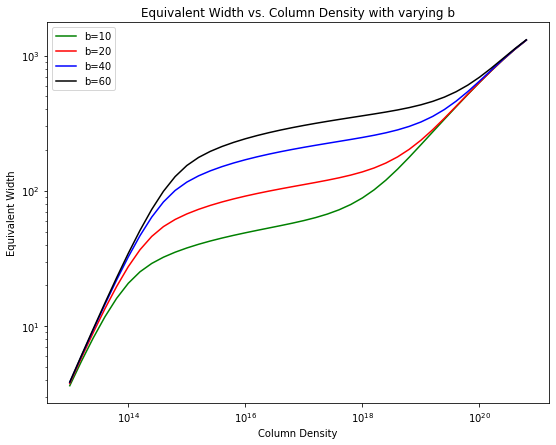

In [9]:
plt.plot(10**N, EW_4,'g', label=('b=10'))
plt.plot(10**N, EW_1,'r', label=('b=20'))
plt.plot(10**N, EW_2,'b', label=('b=40'))
plt.plot(10**N, EW_3,'k', label=('b=60'))
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Column Density')
plt.ylabel('Equivalent Width')
plt.title('Equivalent Width vs. Column Density with varying b')
plt.show()

In [10]:
def Chi_sq_diff(data, m1, m2):
    '''
    m = [model, dof]
    '''
    chi2_1 = chisquare(m1[0], data, m1[1])
    chi2_2 = chisquare(m2[0], data, m2[1])
    return np.abs(chi2_1[0] - chi2_2[0])

def p2sig(data, model):
    chi2 = chisquare(m[0], data, m[1])
    p = chi2[1]
    #to work on 
    return 0

def Chi_sq(model, data, error):
    return np.sum((model-data)**2 / error**2)

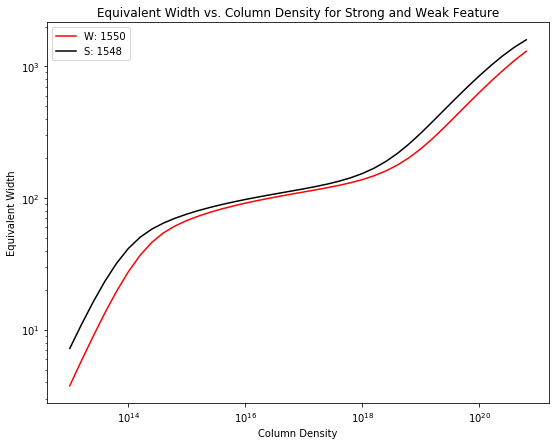

In [11]:
# Plot of EW v N for strong and weak N - Carbon IV


b = 20
# for silicon IV, 1393.755 - 0.51300001 and 1402.77 - 0.255

wlr_w, f_w = 1550.772, 0.0952
wlr_s, f_s = 1548.187, 0.19

Tau_w = N2tau(10**N,wlr_w, f_w)
Tau_s = N2tau(10**N,wlr_s, f_s)

p_w = []
p_s = []
for t in Tau_w:
    p_w.append([b/np.sqrt(2), 0.00324, t, 0, 1])  
for t in Tau_s:
    p_s.append([b/np.sqrt(2), 0.00324, t, 0, 1])
model_w = []
model_s = []
for p in p_w:
    model_w.append(vline(v,p))
for p in p_s:
    model_s.append(vline(v,p))
EW_w = []
EW_s = []
for m in model_w:
    EW_w.append(Equiv_W(m))
for m in model_s:
    EW_s.append(Equiv_W(m))  

plt.plot(10**N, EW_w,'r', label=('W: 1550'))
plt.plot(10**N, EW_s,'k', label=('S: 1548'))
plt.xscale('log')
plt.yscale('log')
#plt.axvline(10**14)
plt.legend()
plt.xlabel('Column Density')
plt.ylabel('Equivalent Width')
plt.title('Equivalent Width vs. Column Density for Strong and Weak Feature')
plt.show()

#plt.savefig('EW_vs_N_plot')
    
